In [2]:
import datetime
import smtplib
from email.mime.text import MIMEText
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')
    import QUANTAXIS as QA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import abupy
from abupy import ABuRegUtil
from concurrent.futures import ThreadPoolExecutor
from functools import reduce
import warnings
read_dictionary = np.load('/media/sf_GIT/vest/liutong.npy',allow_pickle=True).item()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import mpl_finance as mpf
codetx = '515880'
code5g = '515050'
wd = QA.QAFetch.QATdx.QA_fetch_get_stock_day(codetx,'2019-01-18','2020-06-13')

QUANTAXIS>> Selecting the Best Server IP of TDX
Selecting the Best Server IP of TDX


USING DEFAULT STOCK IP
USING DEFAULT FUTURE IP


QUANTAXIS>> === The BEST SERVER ===
 stock_ip 180.153.18.170 future_ip 59.175.238.38
=== The BEST SERVER ===
 stock_ip 180.153.18.170 future_ip 59.175.238.38


In [3]:
rsi = QA.QA_indicator_RSI(wd)
wd['vol5']=QA.MA(wd.vol,5)

In [4]:
buy_index = wd[wd['vol'] >  wd['vol5'] ].index
#wd.loc[buy_index, 'break'] = 1
#wd.loc[buy_index]
for i in range(wd.shape[0]):
    if(wd.index.get_level_values('date')[i] in buy_index):
        print(wd.index.get_level_values('date')[i])

2019-09-19
2019-09-24
2019-09-25
2019-09-26
2019-10-10
2019-10-18
2019-10-21
2019-10-25
2019-10-28
2019-10-29
2019-11-04
2019-11-08
2019-11-11
2019-11-12
2019-11-19
2019-11-22
2019-11-25
2019-11-27
2019-12-02
2019-12-05
2019-12-10
2019-12-12
2019-12-16
2019-12-17
2019-12-25
2020-01-02
2020-01-03
2020-01-06
2020-01-08
2020-01-20
2020-01-21
2020-01-22
2020-01-23
2020-02-03
2020-02-04
2020-02-05
2020-02-14
2020-02-17
2020-02-18
2020-02-24
2020-02-25
2020-02-26
2020-03-03
2020-03-09
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-23
2020-04-02
2020-04-08
2020-04-10
2020-04-13
2020-04-27
2020-04-28
2020-04-29
2020-04-30
2020-05-06
2020-05-07
2020-05-08
2020-05-18
2020-05-20
2020-05-21
2020-05-22
2020-05-25
2020-05-28
2020-06-01
2020-06-02
2020-06-03
2020-06-10
2020-06-11


In [5]:
def force(sample):
    sample['EMA13'] = QA.EMA(sample.close, 13)
    sample['MA20']=QA.MA(sample.close,20)
    sample['optimism'] = sample.high - sample.EMA13
    sample['pessmist'] = sample.low - sample.EMA13
    pp_array = [x for x in sample.close]
    forceweight =[]
    force = [0]
    for m,n in zip(pp_array[:-1],pp_array[1:]):
        force.append(n-m)
        #print (n-m)
    #only for online data. is sample.vol, datat
    volumn = [x for x in sample.vol]
    for x,y in zip(force,volumn):
        #print("{0} and {1}".format(x,y))
        forceweight.append(x*y)

    sample['FORCE']=forceweight
    sample['FCEMA2']=QA.EMA(sample.FORCE,2)
    sample['FCEMA13']=QA.EMA(sample.FORCE,13)
    #print(sample)
    return sample

In [6]:
test = QA.QA_fetch_index_min_adv('515880','2019-10-01','2020-06-01',frequence='15min')

KeyError: 'datetime'

In [7]:
test.data

,,open,high,low,close,up_count,down_count,volume,amount,type
datetime,code,,,,,,,,,
2019-10-08 10:00:00,515880,1.019,1.019,1.015,1.019,NaN,NaN,1.3448e+07,1.3671e+07,15min
2019-10-08 10:15:00,515880,1.019,1.022,1.017,1.019,NaN,NaN,8.5797e+06,8.7524e+06,15min
2019-10-08 10:30:00,515880,1.019,1.019,1.015,1.016,NaN,NaN,1.1209e+07,1.1401e+07,15min
2019-10-08 10:45:00,515880,1.016,1.018,1.015,1.016,NaN,NaN,5.1991e+06,5.2818e+06,15min
2019-10-08 11:00:00,515880,1.016,1.018,1.014,1.018,NaN,NaN,6.4420e+06,6.5413e+06,15min
2019-10-08 11:15:00,515880,1.018,1.019,1.017,1.018,NaN,NaN,5.5543e+06,5.6550e+06,15min
2019-10-08 11:30:00,515880,1.017,1.018,1.015,1.016,NaN,NaN,4.2057e+06,4.2755e+06,15min
2019-10-08 13:15:00,515880,1.016,1.016,1.013,1.014,NaN,NaN,8.4408e+06,8.5643e+06,15min
2019-10-08 13:30:00,515880,1.013,1.014,1.007,1.008,NaN,NaN,1.8142e+07,1.8328e+07,15min


In [7]:
wd = force(wd)

In [8]:
wd.shape[0]

184

In [9]:
    sample = wd
    quotes = []
    #pydate_array = sample.index.get_level_values(index).to_pydatetime()
    #date_only_array = np.vectorize(lambda s: s.strftime(timeFrmate))(pydate_array)
    # date_only_series = pd.Series(date_only_array)
    #N = sample.index.get_level_values(index).shape[0]
    N = wd.shape[0]
    ind = np.arange(N)
    for i in range(len(sample)):
        li = []
        # datet=datetime.datetime.strptime(sample.index.get_level_values('date'),'%Y%m%d')   #字符串日期转换成日期格式
        # datef=mpd.date2num(datetime.datetime.strptime(date_only_array[i],'%Y-%m-%d'))
        datef = ind[i]  # 日期转换成float days
        open_p = sample.open[i]
        close_p = sample.close[i]
        high_p = sample.high[i]
        low_p = sample.low[i]
        li = [datef, open_p, close_p, high_p, low_p]
        t = tuple(li)
        quotes.append(t)
    

NameError: name 'vol5' is not defined

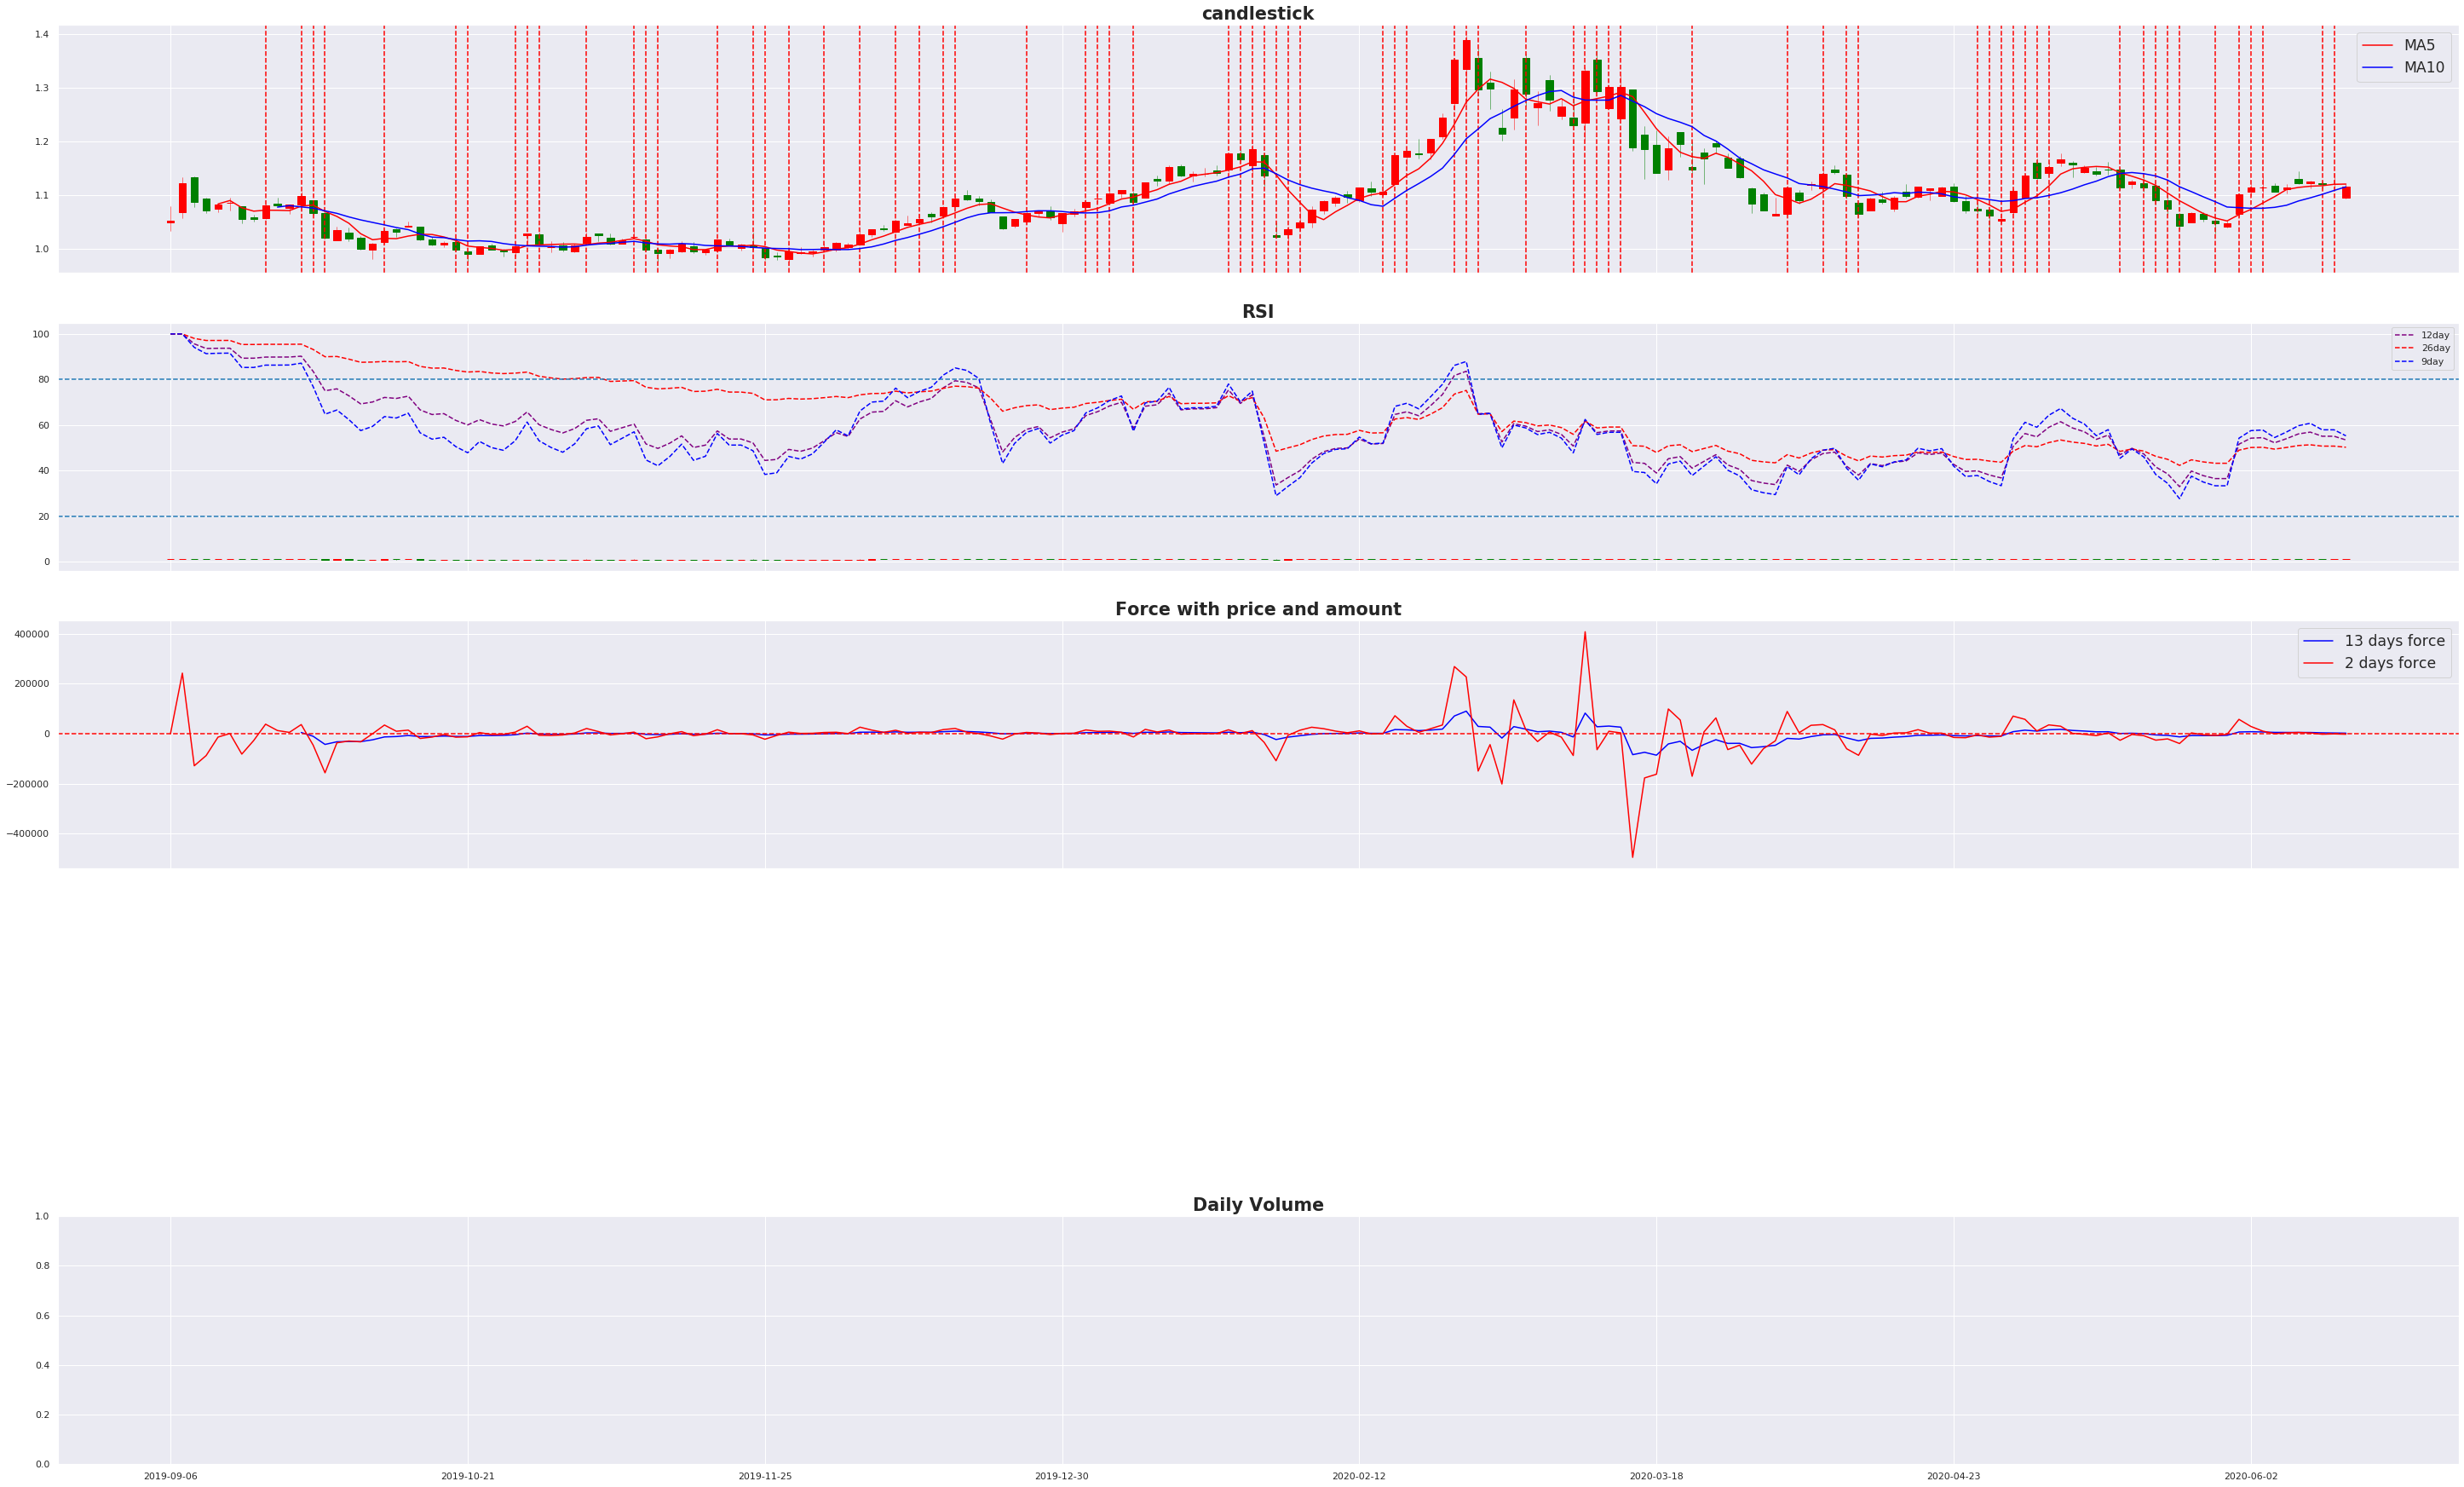

In [10]:
    N = sample.shape[0]
    ind = np.arange(N)
    #macd = QA.QA_indicator_MACD(sample,short=5,long=34,mid=9)
    macd = QA.QA_indicator_MACD(sample)
    sample['vol5'] = QA.MA(sample.vol,5)
    buy_index = sample[sample['vol'] > sample['vol5']].index
    sample.loc[buy_index, 'break'] = 1
    sample['MA5']=QA.MA(sample.close,5)
    sample['MA10']=QA.MA(sample.close,10)
    boll = QA.QA_indicator_BOLL(sample)
    def format_date(x, pos=None):
        if x<0 or x>N-1:
            return ''
    
        return sample.date[int(x)]

    fig = plt.figure()
    fig.set_size_inches(50.5, 34.5)
    # plt.xlabel('Trading Day')
    # plt.ylabel('MACD EMA')
    #ax2 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(5,1,1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')

    # fig,ax=plt.subplots()
    # mpf.candlestick_ochl(ax2,quotes,width=0.2,colorup='r',colordown='g',alpha=1.0)
    # ax2.xaxis_date()
    # plt.setp(plt.gca().get_xticklabels(),rotation=30)
    # ax2.plot(ind,sample.close,'b-',marker='*')
    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
    for i in range(N):
        if(wd.index.get_level_values('date')[i] in buy_index):
            ax2.axvline(x=i,ls='--',color='red')
    
    
            
    ax2.plot(ind,sample.MA5,'r-',label='MA5')
    ax2.plot(ind,sample.MA10,'blue',label='MA10')
    #ax2.plot(ind,sample.MA20,'blue',label='MA20')
    #ax2.plot(ind,sample.close,'blue')
       
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax2.grid(True)
    ax2.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()
    
    
    ax4 = fig.add_subplot(5,1,2,sharex=ax2)
    ax4.set_title("RSI", fontsize='xx-large', fontweight='bold')
    mpf.candlestick_ochl(ax4, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
    ax4.plot(ind,rsi.RSI1,'purple',linestyle='--',label='12day')
    ax4.plot(ind,rsi.RSI2,'red',linestyle='--',label='26day')
    ax4.plot(ind,rsi.RSI3,'blue',linestyle='--',label='9day')
    ax4.axhline(y=80,ls='--')
    ax4.axhline(y=20,ls='--')
    ax4.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax4.grid(True)
    ax4.legend()
    fig.autofmt_xdate()
    
    
    ax3 = fig.add_subplot(5,1,3,sharex=ax2)
    ax3.set_title("Force with price and amount", fontsize='xx-large', fontweight='bold')
    ax3.plot(ind,wd.FCEMA13,'blue',label='13 days force')
    ax3.plot(ind,wd.FCEMA2,'red',label='2 days force')
    ax3.axhline(y=0, ls="--", c="red") 
    ax3.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax3.grid(True)
    ax3.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()
    
    
    ax5 = fig.add_subplot(5,1,5,sharex=ax2)
    ax5.set_title("Daily Volume", fontsize='xx-large', fontweight='bold')
    
    bar_red = np.where(wd.close>wd.open, wd.vol, 0)
    bar_green = np.where(wd.close<=wd.open, wd.vol,0)
    ax5.plot(ind,vol5,'red')
    ax5.bar(ind, bar_red,color='red')
    ax5.bar(ind,bar_green,color='green')
    ax5.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax5.grid(True)
    # t.legend()
    fig.autofmt_xdate()
    
    
    ax1 = fig.add_subplot(5,1,4,sharex=ax2)
    ax1.set_title("MACD,DIF,DEA", fontsize='xx-large', fontweight='bold')
    ax1.plot(ind,macd.DIF,'r-',label='DIF quick')
    ax1.plot(ind,macd.DEA,'blue',label='DEA slow')
    ax1.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax1.grid(True)
    ax1.legend(loc='best',fontsize='x-large')
    # t.legend()
    bar_red = np.where(macd.MACD>=0, macd.MACD, 0)
    bar_green = np.where(macd.MACD<0, macd.MACD,0)
    ax1.bar(ind, bar_red,color='red')
    ax1.bar(ind,bar_green,color='green')
    fig.autofmt_xdate()
    
    

In [10]:
dmi = QA.QA_indicator_DMI(sample)
N = sample.shape[0]
ind = np.arange(N)
roc = QA.QA_indicator_ROC(sample)

NameError: name 'roc' is not defined

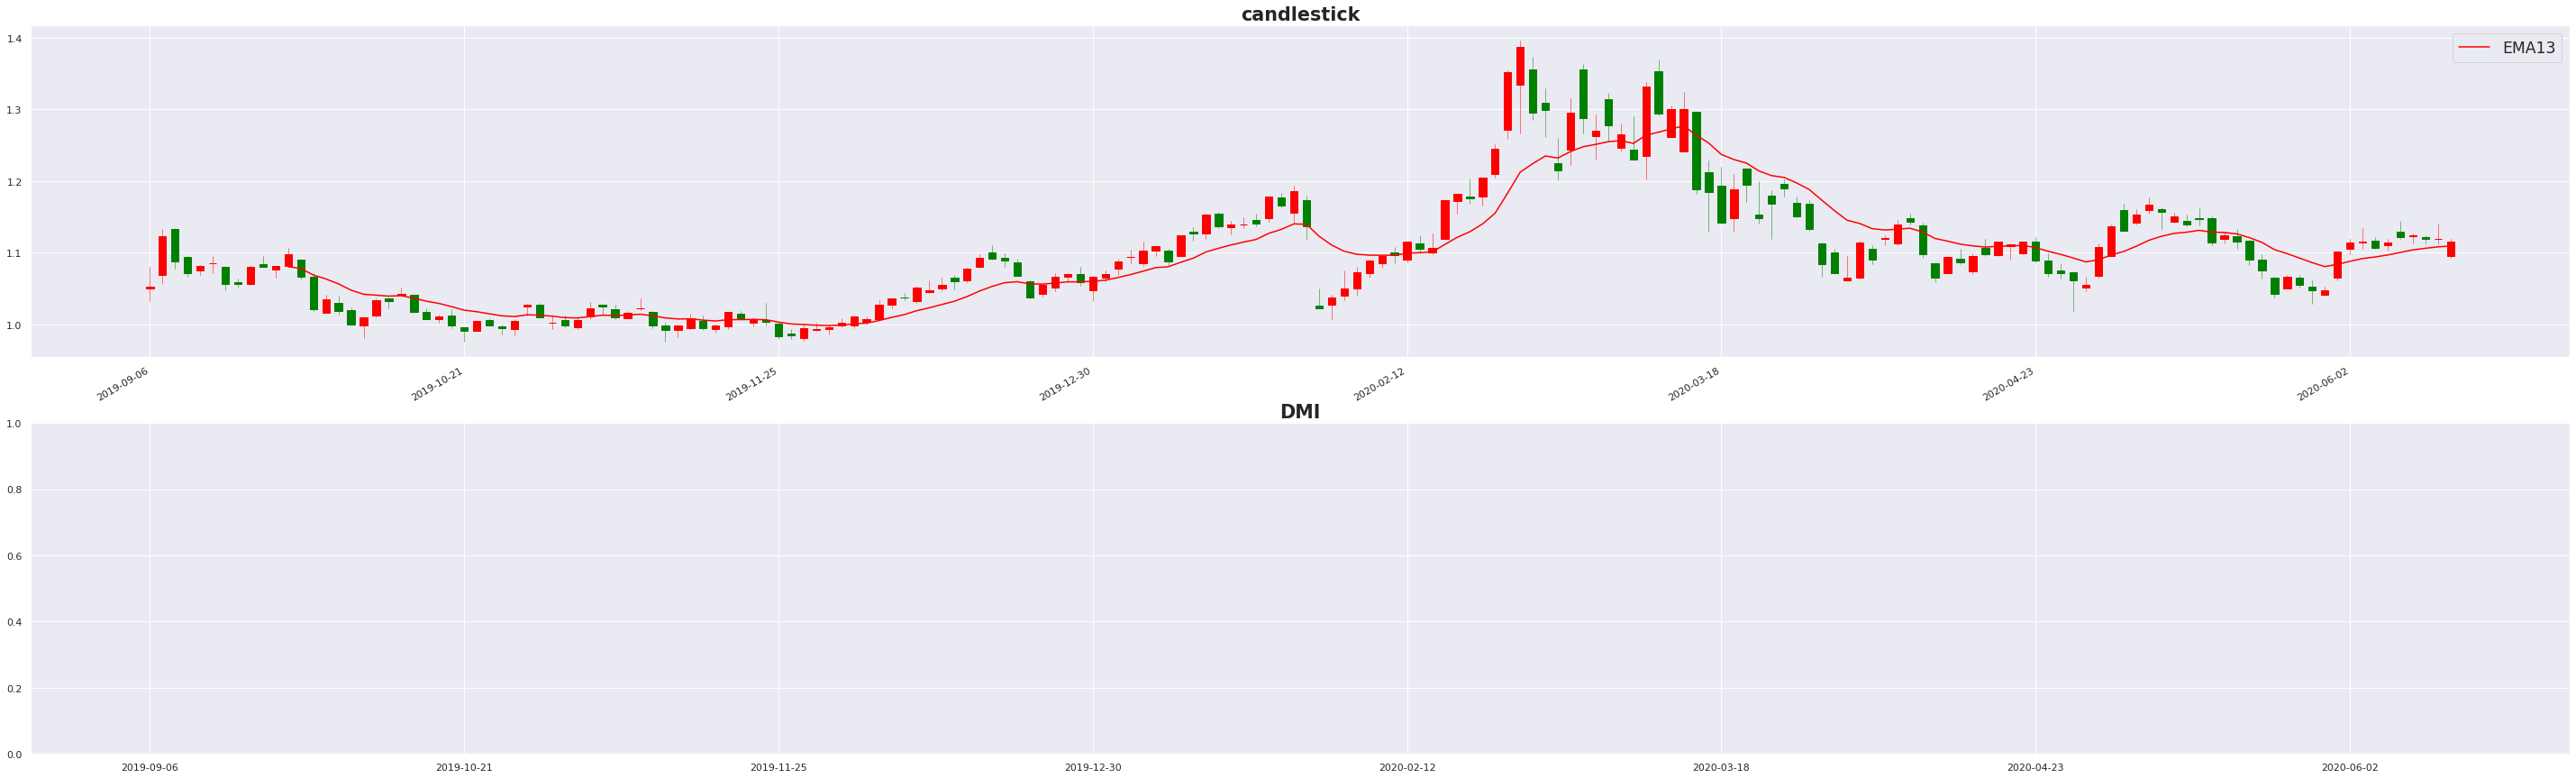

In [11]:
    fig = plt.figure()
    fig.set_size_inches(50.5, 34.5)
    # plt.xlabel('Trading Day')
    # plt.ylabel('MACD EMA')
    #ax2 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(4,1,1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')

    # fig,ax=plt.subplots()
    # mpf.candlestick_ochl(ax2,quotes,width=0.2,colorup='r',colordown='g',alpha=1.0)
    # ax2.xaxis_date()
    # plt.setp(plt.gca().get_xticklabels(),rotation=30)
    # ax2.plot(ind,sample.close,'b-',marker='*')
    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
    ax2.plot(ind,sample.EMA13,'r-',label='EMA13')
    #ax2.plot(ind,sample.close,'blue')
   
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax2.grid(True)
    ax2.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()
    
    
    ax4 = fig.add_subplot(4,1,2,sharex=ax2)
    ax4.set_title("DMI", fontsize='xx-large', fontweight='bold')
    #mpf.candlestick_ochl(ax4, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
    #ax4.plot(ind,dmi.DI1,'red',label='DI1')
    #ax4.plot(ind,dmi.DI2,'purple',linestyle='--',label='DI2')
    #ax4.plot(ind,dmi.ADX,'blue',linestyle='--',label='ADX')
    ax4.plot(ind,roc.ROC,'red',label='ROC')
    ax4.plot(ind,roc.ROCMA,'blue',label='ROCMA')
    ax4.axhline(y=0, ls="--", c="red") 
    ax4.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax4.grid(True)
    ax4.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()
    
    
    ax6 = fig.add_subplot(4,1,3,sharex=ax2)
    ax6.set_title("optimism", fontsize='xx-large', fontweight='bold')
    bar_red = np.where(sample.optimism>=0,sample.optimism,0)
    bar_green = np.where(sample.optimism<0,sample.optimism,0)
    ax6.bar(ind,bar_red,color='red')
    ax6.bar(ind,bar_green,color='green')
    

    ax6.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax6.grid(True)
    ax6.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()
    
    ax6 = fig.add_subplot(4,1,4,sharex=ax2)
    ax6.set_title("pessim", fontsize='xx-large', fontweight='bold')
    bar_pred = np.where(sample.pessmist>=0,sample.pessmist,0)
    bar_pgreen = np.where(sample.pessmist<0,sample.pessmist,0)
    ax6.bar(ind,bar_pred,color='red')
    ax6.bar(ind,bar_pgreen,color='green')
    

    ax6.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax6.grid(True)
    ax6.legend(loc='best',fontsize='x-large')
    # t.legend()
    fig.autofmt_xdate()

In [1]:
import datetime
import smtplib
from email.mime.text import MIMEText
import pandas as pd
import QUANTAXIS as QA

try:
    assert QA.__version__ >= '1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')
    import QUANTAXIS as QA
import numpy as np


read_dictionary = np.load('/media/sf_GIT/vest/liutong.npy', allow_pickle=True).item()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import mpl_finance as mpf
import quant.Util as uti
import quant.MACD as mmacd
import quant.weekTrend as wt


def TrendTunel(sample):
    sample['highEMAS25']=QA.EMA(sample.high,25)
    sample['lowEMAS25'] = QA.EMA(sample.low,25)
    sample['Stunel']=sample.highEMAS25-sample.lowEMAS25
    sample['highEMAL90']=QA.EMA(sample.high,90)
    sample['lowEMAL90']=QA.EMA(sample.low,90)
    sample['EMA13'] = QA.EMA(sample.close, 13)
    rate = 0.015
    sample['EMA12'] = QA.EMA(sample.close, 12)
    sample['EMA5']=QA.EMA(sample.close,5)
    sample['EMA20']=QA.EMA(sample.close,20)
    sample['EMA30']=QA.EMA(sample.close,30)
    
    sample['optimism'] = sample.high - sample.EMA13
    sample['pessmist'] = sample.low - sample.EMA13
    sample['up'] = sample.EMA13 * (1 + rate)
    sample['down'] = sample.EMA13 * (1 - rate)
    sample['EMA26'] = QA.EMA(sample.close, 26)
    sample['MACDQ'] = sample['EMA12'] - sample['EMA26']
    sample['MACDSIG'] = QA.EMA(sample['MACDQ'], 9)
    sample['MACDBlock'] = sample['MACDQ'] - sample['MACDSIG']
    sample['VolumeEMA'] = QA.EMA(sample.vol, 5)
    #sample['VolumeEMA'] = QA.EMA(sample.vol, 5)

    #trend block
    from abupy import pd_rolling_max
    from abupy import pd_expanding_max
    N = 15
    sample['nhigh']=pd_rolling_max(sample.high,window=N)
    expanmax = pd_expanding_max(sample.close)
    sample['nhigh'].fillna(value=expanmax,inplace=True)

    from abupy import pd_rolling_min, pd_expanding_min
    sample['nlow']=pd_rolling_min(sample.low,window=N)
    expanmin = pd_expanding_min(sample.close)
    sample['nlow'].fillna(value=expanmin,inplace = True)



    sroc = []
    for i in range(sample.shape[0]):
        if (i - 21 > 0 and sample.iloc[i].EMA13 != None and sample.iloc[i - 21].EMA13 != None):
            # print(sample.iloc[i].EMA13/sample.iloc[i-21].EMA13)
            sroc.append((sample.iloc[i].EMA13 / sample.iloc[i - 21].EMA13) * 100)
        else:
            sroc.append(100)
    sample['SROC'] = sroc
    size = sample.shape[0]
    hold = []
    for i in range(0,size):
        if(sample.close[i]>sample.highEMAL90[i] and sample.close[i]>sample.highEMAS25[i]):
            hold.append(100)
        elif(sample.close[i]>sample.highEMAL90[i] and sample.close[i]<sample.highEMAS25[i]):
            hold.append(60)
        elif(sample.close[i]<sample.lowEMAL90[i] and sample.close[i]>sample.highEMAS25[i]):
            hold.append(40)
        elif(sample.close[i]<sample.lowEMAL90[i] and sample.close[i]<sample.highEMAS25[i]):
            hold.append(0)
        else:
            hold.append(0)
    sample['hold']=hold

    sample = uti.init_trendMACD(sample,10)
    return sample

def macdHDeviate(hl):

    import math

    localMax = 0
    hm_index = 0

    peakMax = []

    for i in range(0, len(hl)):

        if (not math.isnan(hl[i]) and hl[i] != 0):

            if (hl[i] > localMax):
                hm_index = i
                localMax = hl[i]
        else:
            if (localMax != 0 and hm_index != 0):
                peakMax.append((hm_index, localMax))
                localMax = 0
                hm_index = 0

    if (localMax != peakMax[-1][1] and hm_index != peakMax[-1][0] and localMax !=0):
        peakMax.append((hm_index, localMax))
    return peakMax

def macdLDeviate(tl):

    import math
    localMin = 0
    localMax = 0
    hm_index = 0
    lm_index = 0
    peakMin = []

    for i in range(0, len(tl)):

        if (not math.isnan(tl[i]) and tl[i] != 0):

            if (tl[i] < localMin):
                lm_index = i
                localMin = tl[i]
        else:
            if (localMin != 0 and lm_index != 0):
                peakMin.append((lm_index, localMin))
                localMin = 0
                lm_index = 0
    if (localMin != peakMin[-1][1] and lm_index != peakMin[-1][0] and localMin!=0):
        peakMin.append((lm_index, localMin))
    return peakMin

def plot(sample):
    quotes = []
    #pydate_array = sample.index.get_level_values(index).to_pydatetime()
    #date_only_array = np.vectorize(lambda s: s.strftime(timeFrmate))(pydate_array)
    # date_only_series = pd.Series(date_only_array)
    #N = sample.index.get_level_values(index).shape[0]
    N = wd.shape[0]
    ind = np.arange(N)
    for i in range(len(sample)):
        li = []
        # datet=datetime.datetime.strptime(sample.index.get_level_values('date'),'%Y%m%d')   #字符串日期转换成日期格式
        # datef=mpd.date2num(datetime.datetime.strptime(date_only_array[i],'%Y-%m-%d'))
        datef = ind[i]  # 日期转换成float days
        open_p = sample.open[i]
        close_p = sample.close[i]
        high_p = sample.high[i]
        low_p = sample.low[i]
        li = [datef, open_p, close_p, high_p, low_p]
        t = tuple(li)
        quotes.append(t)
    N = sample.shape[0]
    ind = np.arange(N)
    
    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return sample.index.get_level_values(uti.dayindex)[thisind]

    fig = plt.figure()
    fig.set_size_inches(20.5, 12.5)
    # plt.xlabel('Trading Day')
    # plt.ylabel('MACD EMA')
    ax2 = fig.add_subplot(2, 1, 1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')

    # fig,ax=plt.subplots()
    # mpf.candlestick_ochl(ax2,quotes,width=0.2,colorup='r',colordown='g',alpha=1.0)
    # ax2.xaxis_date()
    # plt.setp(plt.gca().get_xticklabels(),rotation=30)
    # ax2.plot(ind,sample.close,'b-',marker='*')
    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)

    #check high sell or low buy time
    for i in range(13,N):
        Raise =1
        Down = 1
        #print('round {}'.format(i))
        for j in range(i-8,i+1):
            #print('round {}, index {}'.format(i,j))
            if(sample.close[j]>sample.close[j-4]):
                Raise = Raise * 1
                Down = Down * 0
            else:
                Raise = Raise * 0
                Down = Down * 1
        #if(Raise and max(sample.close[i],sample.close[i-1])>max(sample.close[i-2],sample.close[i-3])):
        #if (Raise and sample.close[i] > sample.close[i - 2]):
        if (Raise):
                ax2.scatter(ind[i], sample.high[i] + 1, marker='o', c='blueviolet',s=10)
                #ax2.text(ind[i], sample.high[i]+1, ".",
                    #fontdict={'size': '12', 'color': 'red'})
            #ax2.text(ind[i],sample.high[i]*1.05,'*',
                #fontdict={'size': '12', 'color': 'red'})
                '''
                for m in range(i-8,i+1):
                    ax2.text(ind[m],sample.high[m]+1,".",
                          fontdict={'size': '12', 'color': 'skyblue'})
                '''
        #if (Down and min(sample.close[i], sample.close[i - 1]) < min(sample.close[i - 2], sample.close[i - 3])):
        #if (Down and sample.close[i] < sample.close[i-2]):
        if (Down):
                #for n in range(i - 9, i):
            ax2.scatter(ind[i],sample.low[i]-1, marker = 'o', c='g',s=10)
            #ax2.text(ind[i],sample.low[i]-1,".",fontdict={'size': '12', 'color': 'green'})
            '''
            for n in range(i-8,i+1):
                ax2.text(ind[n],sample.low[n]-1,".",
                          fontdict={'size': '12', 'color': 'green'})
            '''

    #draw Long and Short trend
    # draw Long and Short trend
    bar_redhs = np.where(sample.close > sample.highEMAS25, sample.highEMAS25, 0)
    bar_redls = np.where(sample.close > sample.highEMAS25, sample.lowEMAS25, 0)
    bar_greenhs = np.where(sample.close < sample.lowEMAS25, sample.highEMAS25, 0)
    bar_greenls = np.where(sample.close < sample.lowEMAS25, sample.lowEMAS25, 0)

    ax2.plot(ind, sample.highEMAS25, 'darkred',linewidth=0.1)
    ax2.plot(ind, sample.lowEMAS25, 'darkred',linewidth=0.1)
    ax2.plot(ind, sample.highEMAL90, 'yellow')
    ax2.plot(ind, sample.lowEMAL90, 'yellow')
    #ax2.plot(ind,sample.EMA13,'red')
    ax2.fill_between(ind, bar_redls, bar_redhs, facecolor='pink', alpha=0.3)
    ax2.fill_between(ind, bar_greenls, bar_greenhs, facecolor='blue', alpha=0.3)

    bar_redhl = np.where(sample.close > sample.highEMAL90, sample.highEMAL90, 0)
    bar_redll = np.where(sample.close > sample.highEMAL90, sample.lowEMAL90, 0)

    bar_greenhl = np.where(sample.close < sample.lowEMAL90, sample.highEMAL90, 0)
    bar_greenll = np.where(sample.close < sample.lowEMAL90, sample.lowEMAL90, 0)

    ax2.plot(ind, sample.highEMAS25, 'purple')
    ax2.plot(ind, sample.lowEMAS25, 'purple')
    ax2.plot(ind, sample.highEMAL90, 'yellow')
    ax2.plot(ind, sample.lowEMAL90, 'yellow')
    ax2.fill_between(ind, bar_redls, bar_redhs, facecolor='red', alpha=0.3)
    ax2.fill_between(ind, bar_greenls, bar_greenhs, facecolor='green', alpha=0.3)

    ax2.fill_between(ind, bar_redll, bar_redhl, facecolor='deeppink', alpha=0.3)
    ax2.fill_between(ind, bar_greenll, bar_greenhl, facecolor='blue', alpha=0.3)
    hold_red = np.where(sample.hold == 100, 1, 0)
    hold_purple = np.where(sample.hold == 60, 0.6, 0)
    hold_yellow = np.where(sample.hold == 40, 0.4, 0)
    hold_green = np.where(sample.hold == 0, -0.2, 0)

    ax2.bar(ind, hold_red, color='red')
    ax2.bar(ind, hold_purple, color='purple')
    ax2.bar(ind, hold_yellow, color='yellow')
    ax2.bar(ind, hold_green, color='green')
    #    ax2.text(N/2, pd.DataFrame.max(sample.EMA13), "EMA13 tells trend",
         #    fontdict={'size': '16', 'color': 'b'})
#    ax2.plot(ind, sample.EMA13)
    #ax2.text(ind[-1], sample.high[-1], sample.index.get_level_values('date')[-1].strftime('%Y-%m-%d'),
             #fontdict={'size': '12', 'color': 'b'})
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax2.grid(True)
    ax2.legend(['Long Term Yellow ', 'short Term Purple','1 red ', '0.6 purple', '0.4 yellow','0 green'],
               loc='upper left')
    fig.autofmt_xdate()

    ax1 = fig.add_subplot(2, 1, 2, sharex=ax2)
    ax1.set_title('macd', fontsize='xx-large', fontweight='bold')
    ax1.text(N / 2, pd.DataFrame.max(sample.MACDQ), "MACD Block trend .vs. price trend",
             fontdict={'size': '12', 'color': 'b'})
    ax1.grid(True)
    #ax1.plot(ind, sample.MACDQ, 'r-', marker='.')
    ax1.plot(ind, sample.MACDQ, 'r-')
    ax1.plot(ind, sample.MACDSIG)
    m_red = np.where(sample.MACDBlock >= 0, sample.MACDBlock, 0)
    m_green = np.where(sample.MACDBlock < 0, sample.MACDBlock, 0)
    temp = sample.MACDBlock - m_red
    pm = macdLDeviate(temp.to_list())

    hemp = sample.MACDBlock - m_green
    mm = macdHDeviate(hemp.to_list())
    ax1.bar(ind, m_red, color='red')
    ax1.bar(ind, m_green, color='green')
    #ax1.plot(ind,sample.trend,'purple')
    ax1.plot([pm[-2][0],pm[-1][0]],[pm[-2][1],pm[-1][1]],color='green',linestyle='--')
    if(len(pm)>2):
        ax1.plot([pm[-1][0], pm[-3][0]], [pm[-1][1], pm[-3][1]], color='green',linestyle='--')
    ax1.plot([mm[-2][0], mm[-1][0]], [mm[-2][1], mm[-1][1]], color='red',linestyle='--')
    if(len(mm)>2):
        ax1.plot([mm[-1][0],mm[-3][0]],[mm[-1][1],mm[-3][1]],color='red',linestyle='--')
    ax1.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    ax1.legend(['MACDQ Red','MACDSIG Blue'],loc='upper left')
    # ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    fig.autofmt_xdate()

    plt.show()


def nineTurnANA(code):

    cur = datetime.datetime.now()
    if (str(cur.month) != '10' or str(cur.month) != '11' or str(cur.month) != '12'):
        month = '0' + str(cur.month)
    endtime = str(cur.year) + '-' + month + '-' + str(cur.day)
    print(endtime)
    sample = wd
    sample = TrendTunel(sample)
    print(sample)
    plot(sample[-20:])




if __name__ == "__main__":
    nineTurnANA('000810')
    
    #forceANA('002241')

/root/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


2020-010-12


NameError: name 'wd' is not defined

In [27]:
import dateutil
def getWeekDate(daytime):
    #daytime will be pandas datetime
    #return Timestamp('2020-05-11 00:00:00')
    return daytime+dateutil.relativedelta.relativedelta(days=(6-daytime.dayofweek))
def wds(df):
    df['date'] = pd.to_datetime(df.index.get_level_values('date'))
    df.set_index("date", inplace=True)
    period = 'W'

    weekly_df = df.resample(period).last()
    weekly_df['open'] = df['open'].resample(period).first()
    weekly_df['high'] = df['high'].resample(period).max()
    weekly_df['low'] = df['low'].resample(period).min()
    weekly_df['close'] = df['close'].resample(period).last()
    weekly_df['volume'] = df['volume'].resample(period).sum()
    weekly_df['amount'] = df['amount'].resample(period).sum()
    weekly_df.reset_index('date',inplace=True)
    return weekly_df





def weektrend(sample):
    #print(sample)
    from functools import reduce
    sample['EMA12']= pd.Series.ewm(sample.close, span=12, min_periods=12 - 1, adjust=True).mean()
    sample['EMA26']= pd.Series.ewm(sample.close, span=26, min_periods=26 - 1, adjust=True).mean()
    sample['EMA13']=pd.Series.ewm(sample.close,span=13,min_periods=13-1,adjust=True).mean()
    sample['MACDQ']= sample['EMA12']-sample['EMA26']
    sample['MACDSIG']=pd.Series.ewm(sample.MACDQ, span=9, min_periods=9 - 1, adjust=True).mean()
    sample['MACDBlock']=sample['MACDQ']-sample['MACDSIG']

    pp_array = [float(close) for close in sample.MACDBlock]
    temp_array = [(price1, price2) for price1, price2 in zip(pp_array[:-1], pp_array[1:])]
    change = list(map(lambda pp: reduce(lambda a, b: round((b - a) / a, 3) if a!=0 else 0, pp), temp_array))
    change.insert(0, 0)
    sample['change'] = change
    '''
    kdj = QA.QA_indicator_KDJ(sample)
    sample['K'] = kdj.KDJ_K
    sample['D'] = kdj.KDJ_D
    sample['J'] = kdj.KDJ_J
    '''

    return sample




In [40]:
sample = QA.QA_fetch_index_day_adv('515880','2019-10-01','2020-06-01')
sample.data.index.get_level_values('code')[0]

'515880'

In [29]:
code=sample.index.get_level_values('code')[0]
start = sample.index.get_level_values(dayindex)[0].strftime(dayformate)
end = sample.index.get_level_values(dayindex)[-1].strftime(dayformate)
td = QA.QA_fetch_index_min_adv(sample.index.get_level_values('code')[0], start, end, frequence= '15min')

In [30]:
td.data

,,open,high,low,close,up_count,down_count,volume,amount,type
datetime,code,,,,,,,,,
2019-10-09 10:00:00,515880,0.995,1.000,0.992,1.000,NaN,NaN,1.4892e+07,1.4859e+07,15min
2019-10-09 10:15:00,515880,1.000,1.006,1.000,1.005,NaN,NaN,1.8483e+07,1.8554e+07,15min
2019-10-09 10:30:00,515880,1.006,1.006,0.999,0.999,NaN,NaN,1.0560e+07,1.0575e+07,15min
2019-10-09 10:45:00,515880,0.999,1.003,0.996,0.996,NaN,NaN,7.7123e+06,7.7097e+06,15min
2019-10-09 11:00:00,515880,0.996,0.998,0.993,0.994,NaN,NaN,5.5761e+06,5.5528e+06,15min
2019-10-09 11:15:00,515880,0.993,0.998,0.993,0.997,NaN,NaN,5.0165e+06,4.9882e+06,15min
2019-10-09 11:30:00,515880,0.997,0.997,0.995,0.996,NaN,NaN,1.1953e+06,1.1906e+06,15min
2019-10-09 13:15:00,515880,0.995,1.000,0.995,1.000,NaN,NaN,5.3028e+06,5.2938e+06,15min
2019-10-09 13:30:00,515880,1.000,1.002,0.999,1.000,NaN,NaN,3.6773e+06,3.6793e+06,15min


In [50]:
def triNetindexv2(sample,short=5, long=10, freq='15min'):
    #to get Week and 60 minutes syntony together
    #get week trend
    #A50 64% 30 5 15 12/10
    #
    #60 76, 30 79, 30 74 more
    #15 min is the best for now, with 11/10 (5-10 11, 5-15 10 5-20 )
    print('*'*100)

    sample.fillna(method='ffill',inplace=True)
    wstart = '2019-01-01'
    code = sample.index.get_level_values('code')[-1]
    wend = sample.index.get_level_values(dayindex)[-1].strftime(dayformate)
    #temp = QA.QA_fetch_index_day_adv(code,wstart,wend).data
    wd = wds(sample)
    wd = weektrend(wd)

    start = sample.index.get_level_values(dayindex)[0].strftime(dayformate)
    end = sample.index.get_level_values(dayindex)[-1].strftime(dayformate)
    #code = sample.index.get_level_values('code')[0]
    code = '515880'
    mindata = QA.QA_fetch_index_min_adv(code , start, end, frequence= freq)
    ms = mindata.data
    # print(sample)
    ms['short'] = QA.EMA(ms.close, short)
    ms['long'] = QA.EMA(ms.close, long)
    CROSS_5 = QA.CROSS(ms.short, ms.long)
    CROSS_15 = QA.CROSS(ms.long, ms.short)

    C15 = np.where(CROSS_15 == 1, 3, 0)
    m = np.where(CROSS_5 == 1, 1, C15)
    # single = m[:-1].tolist()
    # single.insert(0, 0)
    ms['single'] = m.tolist()
    sig = [0]
    if(freq=='60min'):
        anchor = -2
    elif(freq=='30min'):
        anchor = -4
    elif(freq=='15min'):
        anchor = -8
    for i in range(1, len(sample)):
        dtime = sample.index.get_level_values(dayindex)[i]
        wtime = getWeekDate(dtime)
        windex = wd[wd.date == wtime.strftime(dayformate)].index[0]
        # here use index to get value interested, here we take change of MACDBlock to get the short trend in week level
        direction = wd.loc[windex].change
        temp = ms[ms.index.get_level_values(index).strftime(dayformate) == sample.index.get_level_values(dayindex)[i].strftime(dayformate)][:anchor]
        tmp = ms[ms.index.get_level_values(index).strftime(dayformate) == sample.index.get_level_values(dayindex)[i-1].strftime(dayformate)][anchor:]
        sing = temp.single.sum()+tmp.single.sum()
        if(direction>0 and sing==1):
            sig.append(1)
        elif(direction<0 and sing>1):
            sig.append(sing)
        else:
            sig.append(0)

    try:
        #sample['single'] = [0]+sig[:-1]
        sample['single']=sig

    except:
        print('error with {}'.format(sample.index.get_level_values('code')[0]))
        sample['single'] = 0


    return sample

In [55]:
sample = QA.QA_fetch_index_day_adv('515880','2019-01-01','2020-06-01').data
triNetindexv2(sample)
day = sample
def MINcandlestruct(sample, index, timeFrmate):

    quotes = []
    #pydate_array = sample.index.get_level_values(index).to_pydatetime()
    #date_only_array = np.vectorize(lambda s: s.strftime(timeFrmate))(pydate_array)
    # date_only_series = pd.Series(date_only_array)
    #N = sample.index.get_level_values(index).shape[0]
    N = sample.shape[0]
    ind = np.arange(N)
    for i in range(len(sample)):
        li = []
        # datet=datetime.datetime.strptime(sample.index.get_level_values('date'),'%Y%m%d')   #字符串日期转换成日期格式
        # datef=mpd.date2num(datetime.datetime.strptime(date_only_array[i],'%Y-%m-%d'))
        datef = ind[i]  # 日期转换成float days
        open_p = sample.open[i]
        close_p = sample.close[i]
        high_p = sample.high[i]
        low_p = sample.low[i]
        li = [datef, open_p, close_p, high_p, low_p]
        t = tuple(li)
        quotes.append(t)
    return quotes
quotes = MINcandlestruct(day, dayindex, dayformate)
    # N = sample.index.get_level_values(index).shape[0]


****************************************************************************************************


QUANTAXIS>> No handles with labels found to put in legend.
No handles with labels found to put in legend.


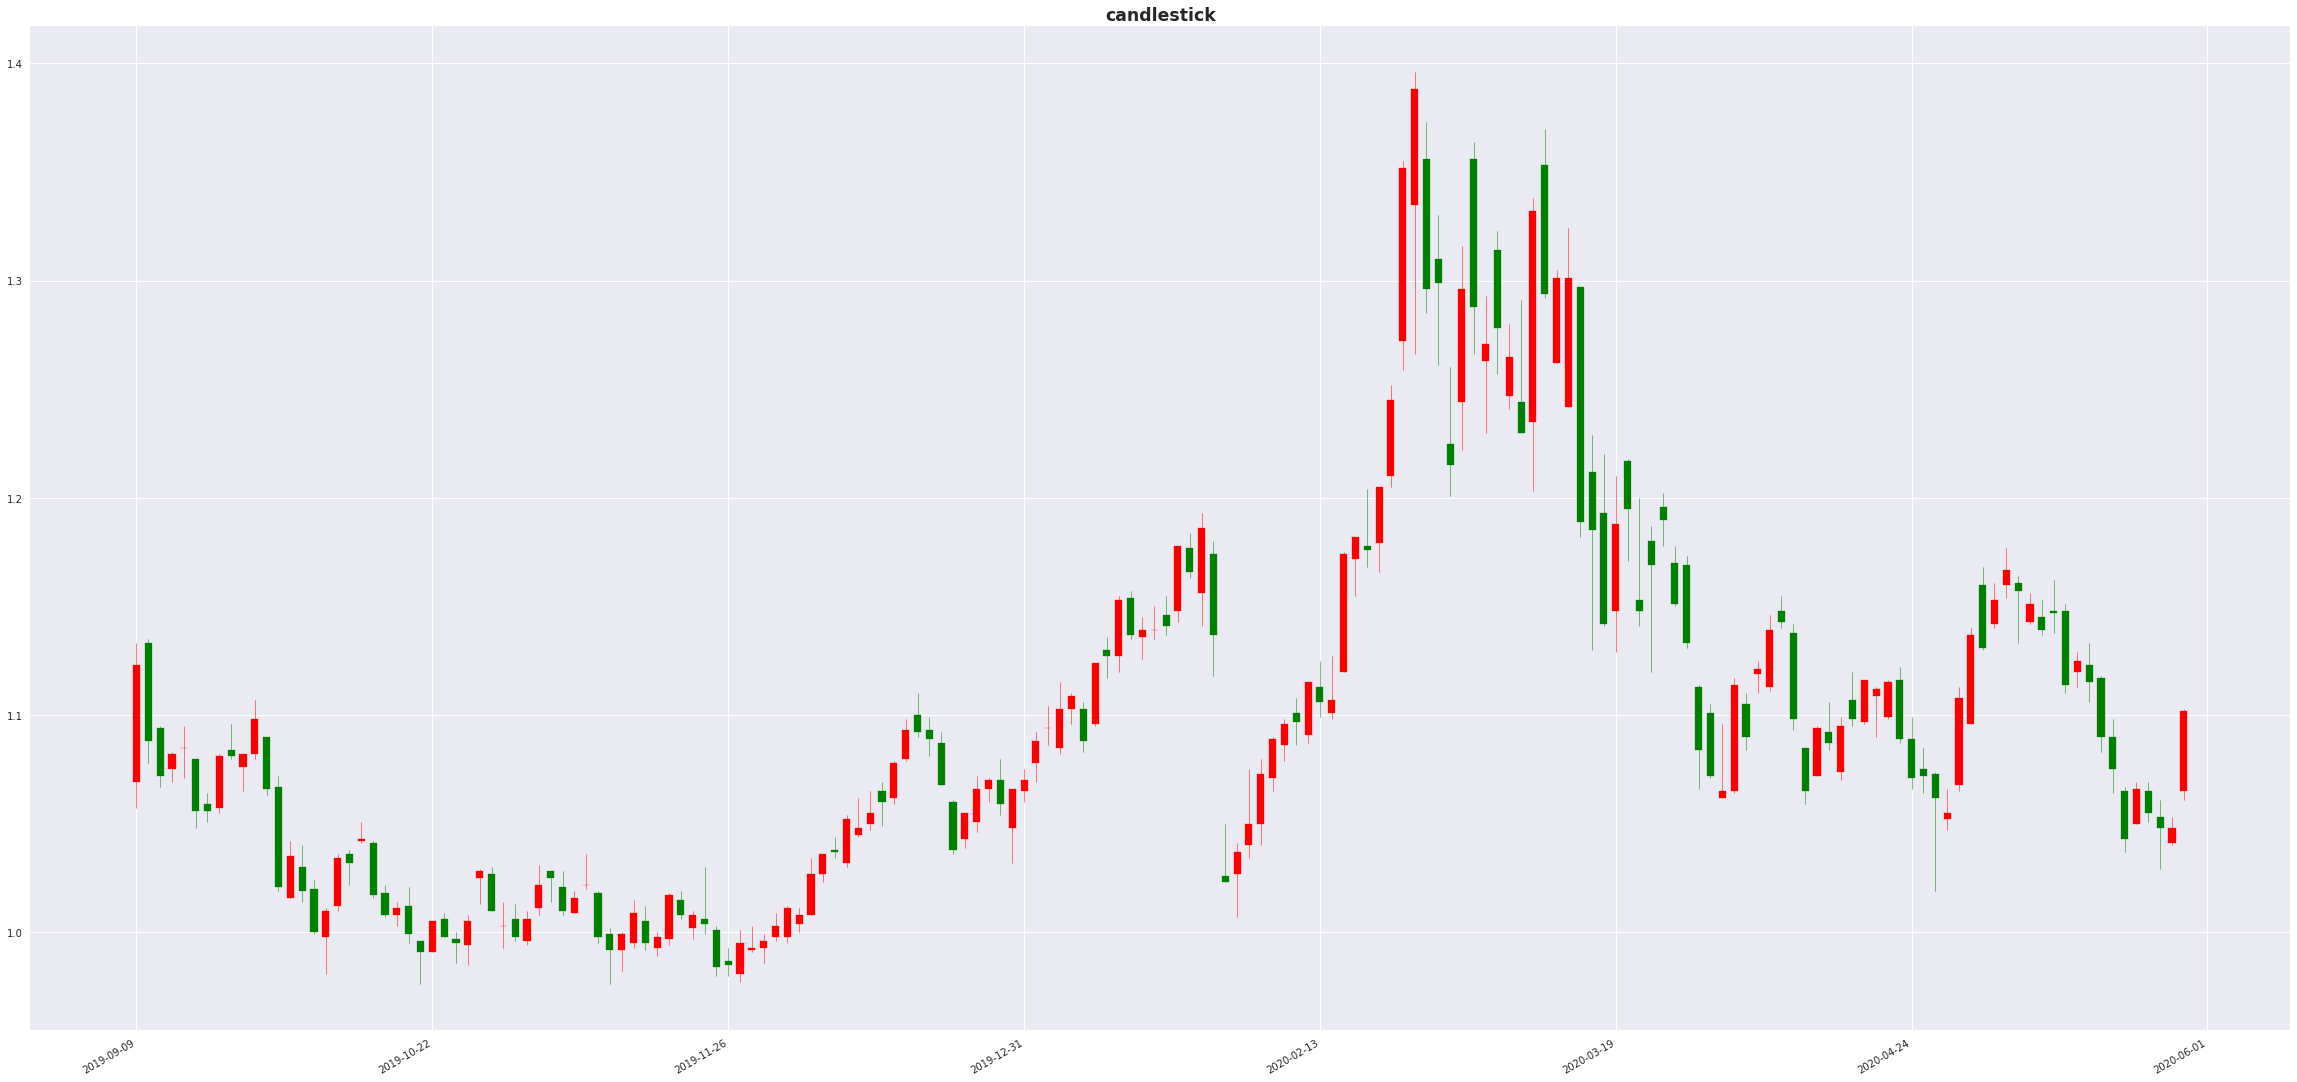

In [56]:
    N = day.shape[0]
    ind = np.arange(N)

    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return day.index.get_level_values(dayindex)[thisind].strftime(dayformate)

    fig = plt.figure()
    fig.set_size_inches(40.5, 20.5)
    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')


    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)

    for i in range(N):
        if (day.single[i] == 1):
            ax2.axvline(x=i, ls='--', color='red')
        if (day.single[i] == 3):
            ax2.axvline(x=i, ls='--', color='green')
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    ax2.grid(True)
    ax2.legend(loc='best')
    fig.autofmt_xdate()
    fig.show()


In [42]:
    holdingperc = 2
    index = 'datetime'
    formate = '%Y-%m-%dT%H:%M:%S'
    dayindex = 'date'
    dayformate = '%Y-%m-%d'
    safeholding = 500
    print('*' * 100)
    print('loading data')
    # stockes = getStocklist()
    # stockes = ['600797','000977']
    # data = loadLocalData(stockes,'2018-03-15',end_date = '2019-09-11')
    print('*' * 100)
    print('init account')
    Account = QA.QA_Account(user_cookie='eric', portfolio_cookie='eric')
    Broker = QA.QA_BacktestBroker()
    Account.reset_assets(100000)
    Account.account_cookie = 'ECAP'
    # codelist=['600797','000977','601068','601069','000977']
    # 云计算，华为，5G概念
    


    cur = datetime.datetime.now()
    # endtime = str(cur.year) + '-' + str(cur.month) + '-' + str(cur.day)
    endtime = '2020-06-01'
    cl = ['515880']
    # data = loadLocalData(codelist, '2019-01-01', endtime)
    data = QA.QA_fetch_index_day_adv(cl, '2019-01-01', endtime)
    #data = data.to_qfq()
    print('*' * 100)
    print('prepare data for back test')
    #no qfq, 15/10, with qfq,
    #ind = data.add_func(trendSingleNew)
    # around 1/6
    #ind = data.add_func(trendTurn)
    # 1.7/6
    #ind = data.add_func(doubleAvgDay)
    # wired with sudden draw back
    #ind = data.add_func(trendBreak)
    #with cl only 7/10
    #with codelist
    #ind = data.add_func(doubleAvgminv2)
    #45/10 with a50, that's -1
    #ind = data.add_func(doubleAvgmin)

    ind = data.add_func(triNetv2)

    #ind = data.add_func(bollStrategy)
    # ind = data.add_func(nineTurn)
    #ind=data.add_func(MACACalculate)
    #ind = data.add_func(EMAOP)
    # cur = datetime.datetime.now()
    # endtime = str(cur.year) + '-' + str(cur.month) + '-' + str(cur.day)
    data_forbacktest = data.select_time('2019-01-01', endtime)
    deal = {}
    for items in data_forbacktest.panel_gen:
        for item in items.security_gen:

            daily_ind = ind.loc[item.index]
            if (daily_ind.single.iloc[0] == 1):
                
                if ((Account.cash_available - safeholding) / (holdingperc * item.close[0]) > 500):
                    order = Account.send_order(
                        code=item.code[0],
                        time=item.date[0],
                        amount=int((Account.cash_available - safeholding) / (holdingperc * item.open[0] *100))*100,
                        towards=QA.ORDER_DIRECTION.BUY,
                        price=item.close[0],
                        order_model=QA.ORDER_MODEL.LIMIT,
                        amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                    #deal[item.code[0]]= int((Account.cash_available - safeholding) / (holdingperc * open*100))*100



                else:
                    order = None
                #start to trade
                if order:
                    # print('sending order '+'*'*60)
                    Broker.receive_order(QA.QA_Event(order=order, market_data=item))
                    #print('got here --------------------')
                    trade_mes = Broker.query_orders(Account.account_cookie, 'filled')
                    #print(trade_mes)
                   # print('got here 2 -------')
                    res = trade_mes.loc[order.account_cookie, order.realorder_id]
                    #print('got here 3 -------- ')
                    order.trade(res.trade_id, res.trade_price, res.trade_amount, res.trade_time)
                   #print('*' * 100)
                    print(str(item.date[0]) + " buy " + item.code[0])

            elif (daily_ind.single.iloc[0] == 3):
                #close = QA.QA_fetch_stock_day_adv(item.code[0], item.date[0], item.date[0]).data.close[0] if np.isnan(
                    #daily_ind.close.iloc[0]) else item.close[0]
                if Account.sell_available.get(item.code[0], 0) > 0:
                    print('>' * 100)
                    print(str(item.date[0]) + " sell " + item.code[0])
                    order = Account.send_order(
                        code=item.code[0],
                        time=item.date[0],
                        amount=Account.sell_available.get(item.code[0], 0),
                        #amount = deal.get(item.code[0]),
                        towards=QA.ORDER_DIRECTION.SELL,
                        price=item.close[0],
                        order_model=QA.ORDER_MODEL.LIMIT,
                        amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                    if order:
                        Broker.receive_order(QA.QA_Event(order=order, market_data=item))
                        trade_mes = Broker.query_orders(Account.account_cookie, 'filled')
                        res = trade_mes.loc[order.account_cookie, order.realorder_id]
                        order.trade(res.trade_id, res.trade_price, res.trade_amount, res.trade_time)
        Account.settle()

    print('*' * 100)
    print('analyse account profit')
    Risk = QA.QA_Risk(Account)
    Risk.assets.plot()
    print(Risk.profit_construct)
    print('winning ratio is {}'.format(winRatio(Account)))

****************************************************************************************************
loading data
****************************************************************************************************
init account
****************************************************************************************************
prepare data for back test
****************************************************************************************************


KeyError: "None of [MultiIndex(levels=[[2019-09-09 00:00:00], ['515880']],\n           codes=[[0], [0]],\n           names=['date', 'code'])] are in the [index]"

In [16]:
def tunel(sample):
    sample['highEMAS25']=QA.EMA(sample.high,25)
    sample['lowEMAS25'] = QA.EMA(sample.low,25)
    sample['Stunel']=sample.highEMAS25-sample.lowEMAS25
    sample['highEMAL90']=QA.EMA(sample.high,90)
    sample['lowEMAL90']=QA.EMA(sample.low,90)
    sample['EMA13'] = QA.EMA(sample.close, 13)
    size = sample.shape[0]
    hold = []
    for i in range(0,size):
        if(sample.close[i]>sample.highEMAL90[i] and sample.close[i]>sample.highEMAS25[i]):
            hold.append(100)
        elif(sample.close[i]>sample.highEMAL90[i] and sample.close[i]<sample.highEMAS25[i]):
            hold.append(60)
        elif(sample.close[i]<sample.lowEMAL90[i] and sample.close[i]>sample.highEMAS25[i]):
            hold.append(40)
        elif(sample.close[i]<sample.lowEMAL90[i] and sample.close[i]<sample.highEMAS25[i]):
            hold.append(0)
        else:
            hold.append(0)
    sample['hold']=hold

    return sample
    

In [17]:
tunel(wd)

,open,close,high,low,vol,amount,date,code,date_stamp,EMA13,...,MACDQ,MACDSIG,MACDBlock,VolumeEMA,nhigh,nlow,SROC,hold,trend,amountRatio
date,,,,,,,,,,,,,,,,,,,,,
2019-09-06,1.050,1.053,1.080,1.033,4859951.0,5.1041e+08,2019-09-06,515880,1.5677e+09,NaN,...,NaN,NaN,NaN,NaN,1.053,1.053,100.0000,0,-0.6874,1.2173
2019-09-09,1.069,1.123,1.133,1.057,4614146.0,5.0016e+08,2019-09-09,515880,1.5680e+09,NaN,...,NaN,NaN,NaN,NaN,1.123,1.053,100.0000,0,-0.6874,1.1929
2019-09-10,1.133,1.088,1.135,1.078,8367766.0,9.1577e+08,2019-09-10,515880,1.5680e+09,NaN,...,NaN,NaN,NaN,NaN,1.123,1.053,100.0000,0,-0.6874,2.1840
2019-09-11,1.094,1.072,1.095,1.067,4225866.0,4.5598e+08,2019-09-11,515880,1.5681e+09,NaN,...,NaN,NaN,NaN,5.5226e+06,1.123,1.053,100.0000,0,-0.6874,1.0875
2019-09-12,1.075,1.082,1.083,1.069,2306155.0,2.4835e+08,2019-09-12,515880,1.5682e+09,NaN,...,NaN,NaN,NaN,4.2878e+06,1.123,1.053,100.0000,0,-0.6874,0.5923
2019-09-16,1.085,1.085,1.095,1.071,2615752.0,2.8355e+08,2019-09-16,515880,1.5686e+09,NaN,...,NaN,NaN,NaN,3.6768e+06,1.123,1.053,100.0000,0,-0.6874,0.6762
2019-09-17,1.080,1.056,1.080,1.048,4227280.0,4.4895e+08,2019-09-17,515880,1.5686e+09,NaN,...,NaN,NaN,NaN,3.8717e+06,1.123,1.053,100.0000,0,-0.6874,1.0707
2019-09-18,1.059,1.056,1.064,1.051,2063782.0,2.1827e+08,2019-09-18,515880,1.5687e+09,NaN,...,NaN,NaN,NaN,3.2446e+06,1.123,1.053,100.0000,0,-0.6874,0.5206
2019-09-19,1.057,1.081,1.082,1.055,2832896.0,3.0272e+08,2019-09-19,515880,1.5688e+09,NaN,...,NaN,NaN,NaN,3.1037e+06,1.123,1.053,100.0000,0,-0.6874,0.7220


In [20]:
print(sample.close[-1],sample.highEMAS25[-1],sample.highEMAS25[-1])

1.123 1.117535154674789 1.117535154674789
